# Regression model

In [178]:
from sklearn.linear_model import LinearRegression
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

In [179]:
# Read the CSV file
all_data = pd.read_csv("data_for_main_model/data_ready_for_training.csv")
all_data.drop('Unnamed: 0',axis='columns', inplace=True)
all_data = all_data[["relh", "sknt", "temp"]]

In [180]:
all_data.tail()

,relh,sknt,temp
69981,86.79,3.0,4.0
69982,93.14,3.0,3.0
69983,86.79,4.0,4.0
69984,86.79,5.0,4.0
69985,86.79,6.0,4.0


In [181]:
relh = all_data['temp']

In [182]:
def transform_and_split_data(df_input, window_size = 3, test_size = 0.1, timestamps_count = 0):
    df = df_input.to_numpy()
    data_count = len(df)
    X = []
    y = []
    # Explanatory X and Response y variables 
    for i in range(data_count-window_size - timestamps_count):
        row = [r for r in df[i:i+window_size]]
        X.append(row)
        label = [df[i+window_size + timestamps_count]]
        y.append(label)
    X = np.array(X)
    y = np.array(y)
    # data split
    train_size = 1 - test_size 
    train_last_el = int(data_count * train_size)

    X_train, y_train = X[:train_last_el], y[:train_last_el]
    X_test, y_test = X[train_last_el:], y[train_last_el:]

    return  X_train, y_train, X_test, y_test

In [183]:
# data to manipulate
window_size = 6
test_size = 0.1
timestamps_count = 0

In [184]:
X_train, y_train, X_test, y_test = transform_and_split_data(relh, window_size, test_size, timestamps_count)

# Regression model for temeprature

In [185]:
reg = LinearRegression().fit(X_train, y_train)

In [186]:
reg.score(X_train, y_train)

0.9864433764902987

In [187]:
print(reg.coef_)
print(reg.intercept_)

[[ 0.05968094 -0.05124042 -0.07185952 -0.14581036 -0.10505011  1.30010653]]
[0.13363522]


In [188]:
pred = reg.predict(X_test)

<Figure size 1000x480 with 0 Axes>

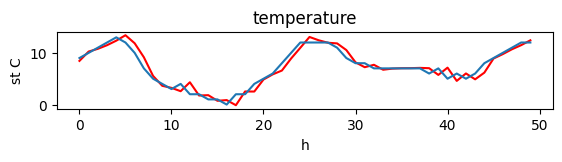

In [189]:
plt.figure().set_figwidth(10)
plt.figure().set_figheight(1)
plt.plot(pred[0:50], 'r')
plt.plot(y_test[0:50])
plt.title('temperature')
plt.xlabel('h')  
plt.ylabel('st C') 
plt.show()

In [193]:
# MSE calculations for given window size and etc. in next 1 to 5 next hours
window_size = 6
test_size = 0.1

def return_time(window_size,test_size):
    MSE = []
    last_pred_hour = 5
    for hour in range(last_pred_hour):
        X_train, y_train, X_test, y_test = transform_and_split_data(relh, window_size, test_size, hour)
        reg = LinearRegression().fit(X_train, y_train)
        pred = reg.predict(X_test)
        MSE.append(mean_squared_error(y_test, pred))


    return MSE

MSE = return_time(window_size,test_size)
print(MSE)

[1.3101876196386704, 3.5368608155813974, 6.785420744567002, 10.636392551918387, 14.719419761480026]
